In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%load_ext autoreload
%autoreload 2

# Identical-Dominated Gaussian KSBM & Critical Times

In [2]:
def dv_dom_gauss_KSB(t, v):
    return -(np.exp(-v)*kappa*2*v/n) 

K=10 : t_crit=2.785571142284569
K=25 : t_crit=1.122244488977956
K=50 : t_crit=0.561122244488978
K=75 : t_crit=0.3807615230460922
K=100 : t_crit=0.280561122244489


C:\Users\arthu\AppData\Local\Temp\ipykernel_10576\3507278604.py:2: RuntimeWarning: overflow encountered in exp
  return -(np.exp(-v)*kappa*2*v/n)
C:\Users\arthu\AppData\Local\Temp\ipykernel_10576\3507278604.py:2: RuntimeWarning: invalid value encountered in multiply
  return -(np.exp(-v)*kappa*2*v/n)


Text(0.5, 1.0, 'Theoretical Variance ($n=3$)')

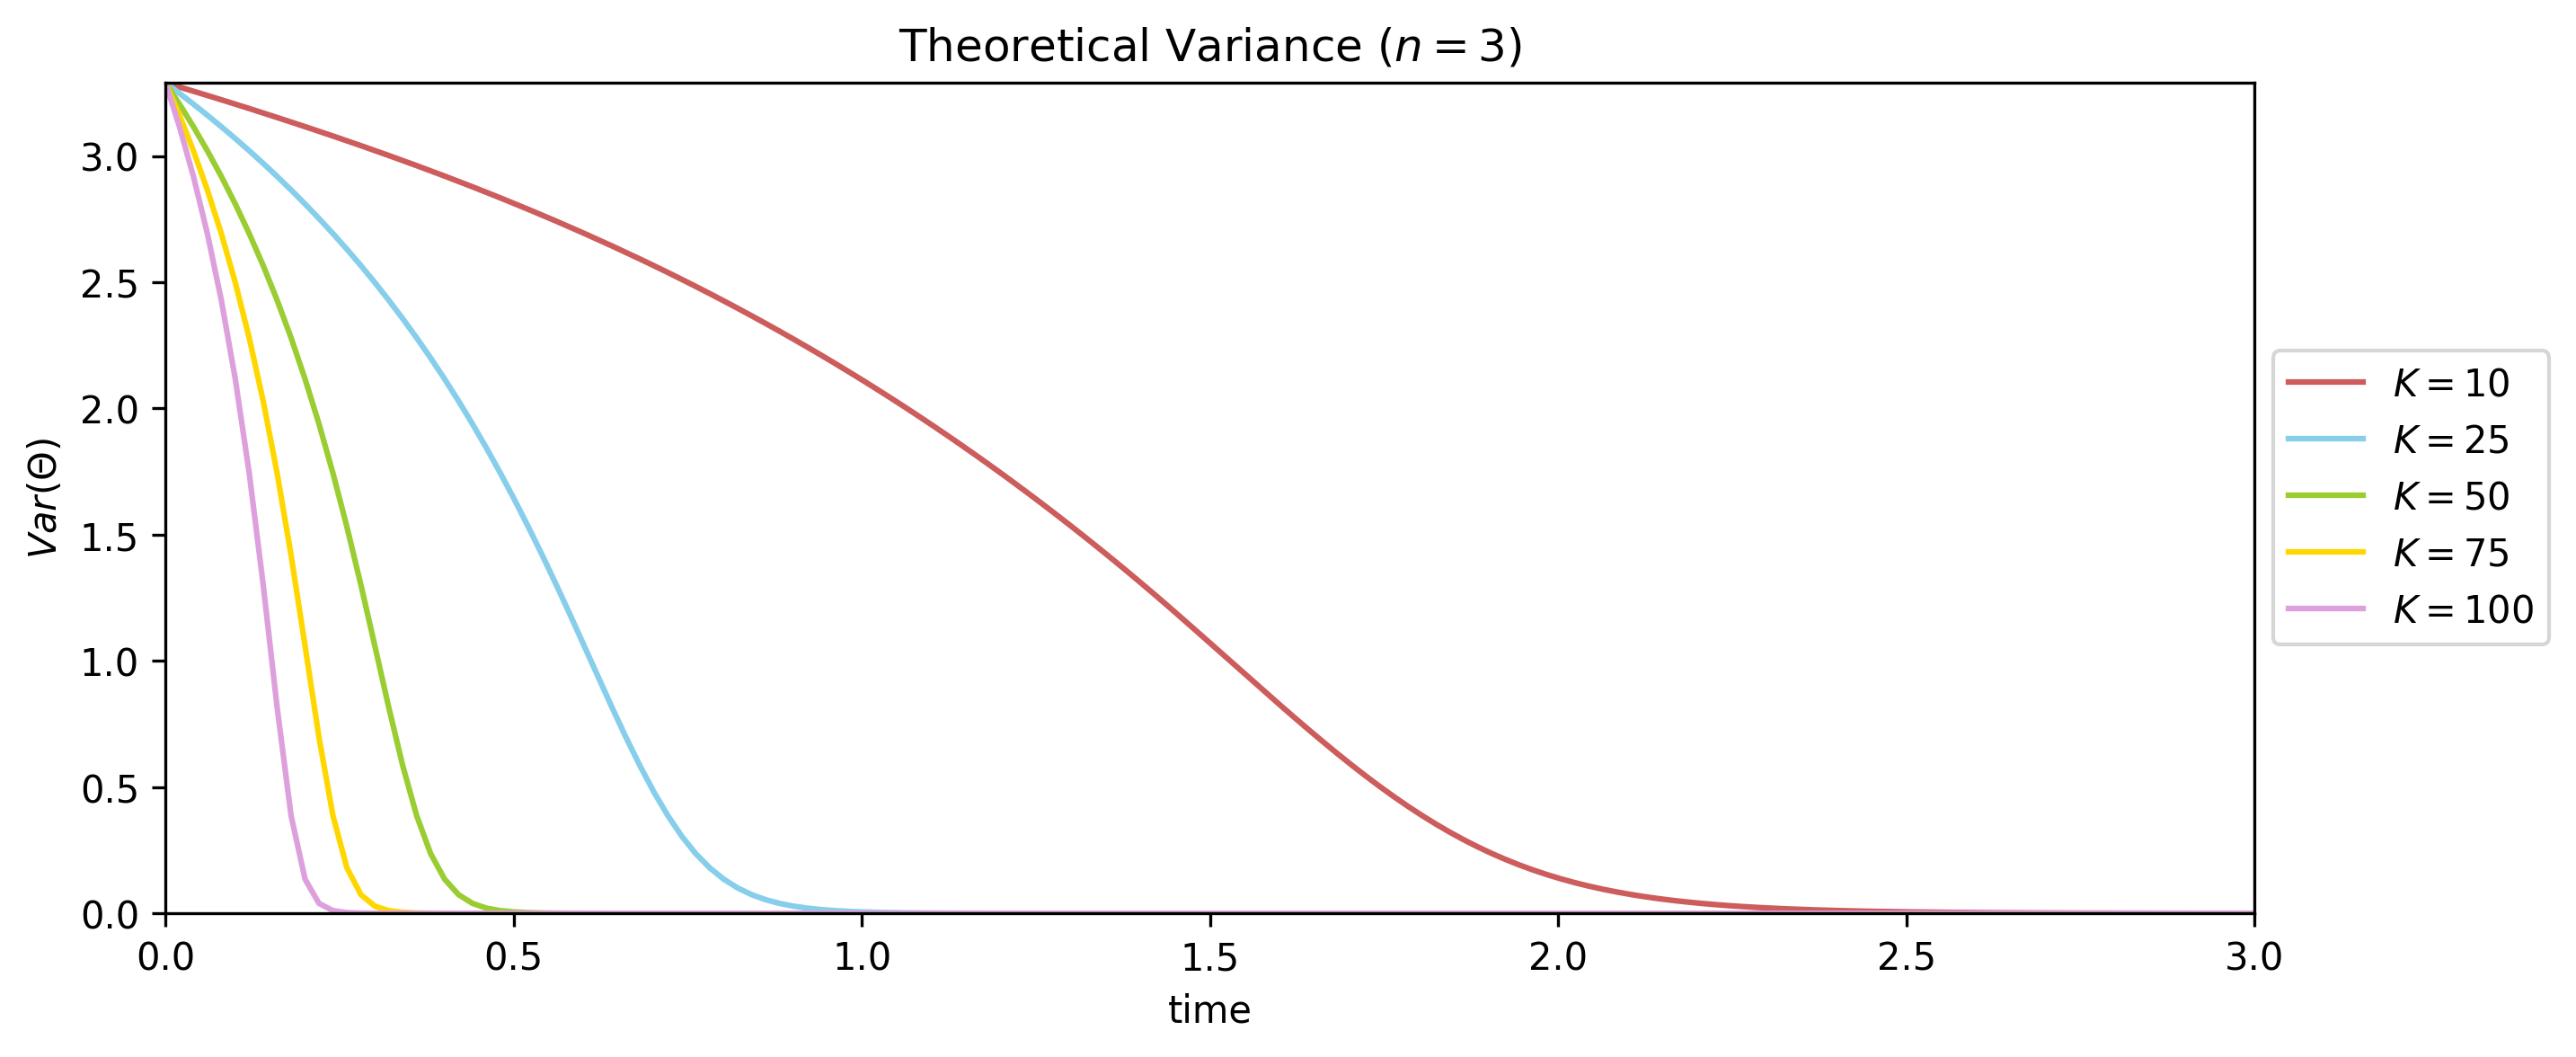

In [3]:
N = 99
n = 3
N_c = N//n

colors = ['indianred', 'skyblue', 'yellowgreen', 'gold', 'plum', 'cornflowerblue']

t = np.linspace(0, 10, 500)
var = ((2*np.pi)**2)/12

plt.figure(figsize=(10, 4), dpi=300)

ks = [10, 25, 50, 75, 100]
for i,kappa in enumerate(ks):
    sol_var = solve_ivp(dv_dom_gauss_KSB, [t[0], t[-1]], [var], t_eval=t)    
    plt.plot(t, sol_var.y[0], label=r'$K={}$'.format(kappa), c=colors[i])
    t_crit = np.min(t[sol_var.y[0]<= 1/(N_c**2)])
    print(r'K={} : t_crit={}'.format(kappa, t_crit))
plt.xlabel('time')
plt.ylabel(r'$Var(\Theta)$')
plt.legend()
plt.legend(bbox_to_anchor=(1.15, .7))
plt.xlim(0,3)
plt.ylim(0, ((2*np.pi)**2)/12)
plt.title(r'Theoretical Variance ($n=3$)')